<a href="https://colab.research.google.com/github/adnan855570/World-Happines-Project/blob/main/World_Happines_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install & Import Libraries

In [ ]:

# Install libraries (if not already installed)
!pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the Dataset

In [ ]:

# Load the dataset
df = pd.read_excel("/content/World Happiness.xlsx")
df.head()


,Country,Year,GDP,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,2008,7.370,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2009,7.540,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,2010,7.647,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,2011,7.620,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,2012,7.705,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


# Clean the Data

In [ ]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Drop duplicates and missing values
df = df.drop_duplicates()
df = df.dropna()

# Display basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 152
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           151 non-null    object 
 1   Year              151 non-null    int64  
 2   GDP               151 non-null    float64
 3   Happiness Rank    151 non-null    int64  
 4   Happiness Score   151 non-null    float64
 5   Economy           151 non-null    float64
 6   Family            151 non-null    float64
 7   Health            151 non-null    float64
 8   Freedom           151 non-null    float64
 9   Generosity        151 non-null    float64
 10  Corruption        151 non-null    float64
 11  Dystopia          151 non-null    float64
 12  Job Satisfaction  151 non-null    float64
 13  Region            151 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 17.7+ KB


# Statistical Question

## Q1: What is the average Happiness Score?

In [ ]:
avg_happiness = df['Happiness Score'].mean()
print(" Average Happiness Score across all countries:", round(avg_happiness, 2))


 Average Happiness Score across all countries: 5.36


# Conditional Filtering Questions

## Q2: Countries with Economy > 1.0 and Freedom > 0.5

In [ ]:
filter1 = df[(df['Economy'] > 1.0) & (df['Freedom'] > 0.5)]
print(" Countries with Economy > 1.0 and Freedom > 0.5:")
filter1[['Country', 'Economy', 'Freedom']]


 Countries with Economy > 1.0 and Freedom > 0.5:


,Country,Economy,Freedom
0,Norway,1.616463,0.635423
1,Denmark,1.482383,0.626007
2,Iceland,1.480633,0.627163
3,Switzerland,1.564980,0.620071
4,Finland,1.443572,0.617951
5,Netherlands,1.503945,0.585384
6,Canada,1.479204,0.611101
7,New Zealand,1.405706,0.614062
8,Sweden,1.494387,0.612924
9,Australia,1.484415,0.601607


## Q3: Countries with Health > 0.8 and Happiness Score < 5

In [ ]:
filter2 = df[(df['Health'] > 0.8) & (df['Happiness Score'] < 5)]
print(" Countries with Health > 0.8 and Happiness Score < 5:")
filter2[['Country', 'Health', 'Happiness Score']]


 Countries with Health > 0.8 and Happiness Score < 5:


,Country,Health,Happiness Score


# Grouping Question

## Q4: Average Happiness Score per Region

In [ ]:
region_avg = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
print(" Average Happiness Score per Region:")
region_avg


 Average Happiness Score per Region:


,Happiness Score
Region,
North America,7.154500
Western Europe,6.880474
Latin America,5.957818
Eastern Europe,5.498952
Asia-Pacific,5.358326
Africa,4.254581
Europe,4.096000


# Sorting Question

## Q5: Top 5 Happiest Countries

In [ ]:
top_5 = df.sort_values('Happiness Score', ascending=False).head(5)
print(" Top 5 Happiest Countries:")
top_5[['Country', 'Happiness Score']]


 Top 5 Happiest Countries:


,Country,Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


# Combination Questions

## Q6: Top 5 countries in the region with highest average Happiness Score

In [ ]:
top_region = region_avg.idxmax()
region_df = df[df['Region'] == top_region]
top_5_region = region_df.sort_values('Happiness Score', ascending=False).head(5)
print(f" Top 5 countries in region '{top_region}' by Happiness Score:")
top_5_region[['Country', 'Happiness Score']]


 Top 5 countries in region 'North America' by Happiness Score:


,Country,Happiness Score
6,Canada,7.316
13,United States,6.993


## Q7: Countries with above-average Economy and Health, sorted by Freedom

In [ ]:
econ_avg = df['Economy'].mean()
health_avg = df['Health'].mean()

combo_df = df[(df['Economy'] > econ_avg) & (df['Health'] > health_avg)]
combo_sorted = combo_df.sort_values('Freedom', ascending=False)

print(" Countries with above-average Economy and Health, sorted by Freedom:")
combo_sorted[['Country', 'Economy', 'Health', 'Freedom']]


 Countries with above-average Economy and Health, sorted by Freedom:


,Country,Economy,Health,Freedom
0,Norway,1.616463,0.796667,0.635423
2,Iceland,1.480633,0.833552,0.627163
1,Denmark,1.482383,0.792566,0.626007
3,Switzerland,1.564980,0.858131,0.620071
4,Finland,1.443572,0.809158,0.617951
...,...,...,...,...
71,Serbia,1.069318,0.650785,0.208716
81,Montenegro,1.121129,0.667465,0.194989
73,Hungary,1.286012,0.687763,0.175864
80,Venezuela,1.128431,0.617144,0.153997


# Visualizations

## Q8: Bar Chart - Avg Happiness Score per Region

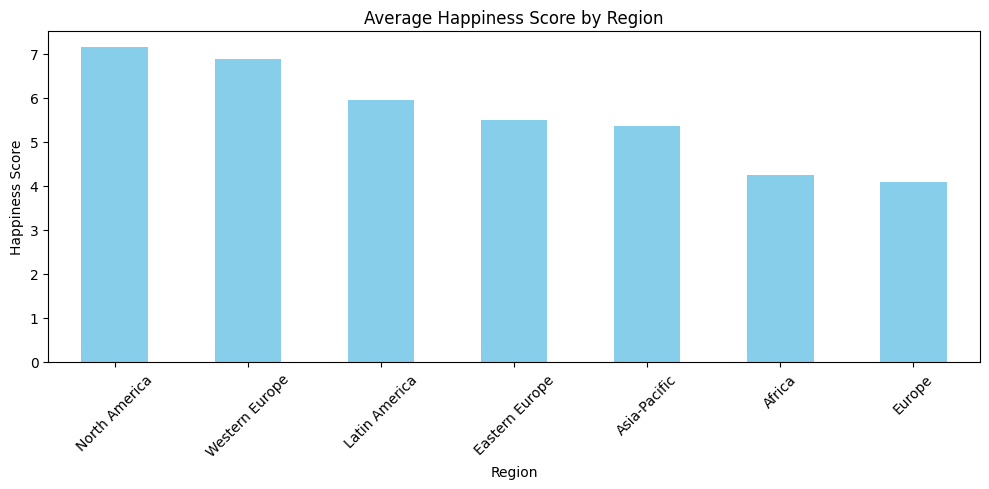

In [ ]:
plt.figure(figsize=(10, 5))
region_avg.plot(kind='bar', color='skyblue')
plt.title("Average Happiness Score by Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Q9: Scatter Plot - Economy vs Happiness Score

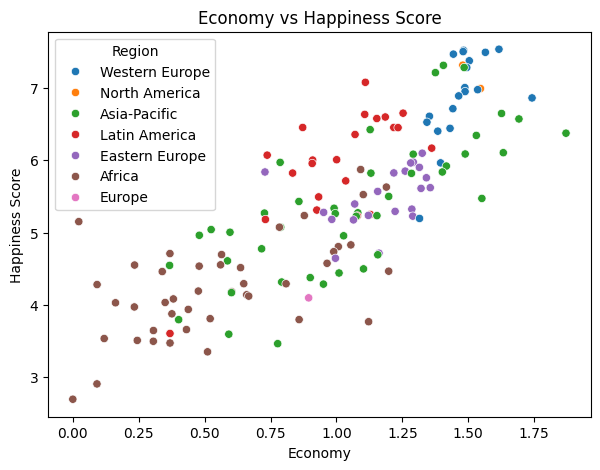

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Economy', y='Happiness Score', hue='Region')
plt.title("Economy vs Happiness Score")
plt.xlabel("Economy")
plt.ylabel("Happiness Score")
plt.show()


## Q10: Pie Chart - Countries per Region

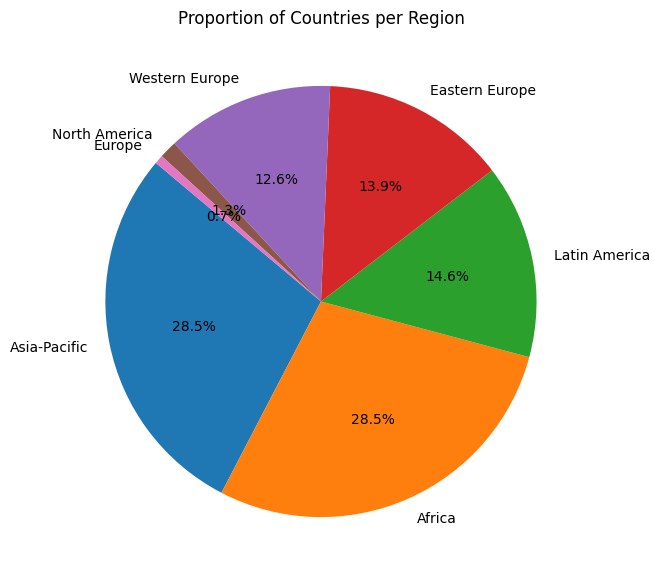

In [ ]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(7, 7))
region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Proportion of Countries per Region")
plt.ylabel("")
plt.show()
